<a href="https://colab.research.google.com/github/abhi9rocks/DL/blob/master/doggoDL1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
ls

'doggo 2.jpg'   doggo.jpg


In [0]:
cd drive/My\ Drive/pics

[Errno 2] No such file or directory: 'drive/My Drive/pics'
/content/drive/My Drive/pics


In [0]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [0]:
#spatial anti-aliasing is a technique for minimizing the distortion 
#artifacts known as aliasing when representing a high-resolution image at a lower resolution.
def load_my_image(fname = 'doggo.jpg'):
    '''returns array containing greyscale values for supplied file (at thumbnail size)'''
    image_color = Image.open(fname).resize((135, 188), Image.ANTIALIAS)
    image_grayscale = image_color.convert('L')
    image_array = np.asarray(image_grayscale)
    return(image_array)

In [0]:
#We lose some amount of data when it passes through a filter(convolution)
#Output is always   n-f+1
# 0 padding is most used
def visualize_conv(image, conv):
    conv_array = np.array(conv)
    vertical_padding = conv_array.shape[0] - 1
    horizontal_padding = conv_array.shape[1] - 1
    conv_out = scale_for_display(apply_conv_to_image(conv_array, image), contrast_factor=350)
    show(np.hstack([image[:-vertical_padding, :-horizontal_padding], conv_out]), False)

In [0]:
def show(image, scale_before_display=True):
    '''Displays numpy array as image.  Scale_before_display ensures values are integers in [0, 256]'''
    if scale_before_display:
        to_display = scale_for_display(image)
    else:
        to_display = image
    plt.imshow(to_display, cmap='gray')
    plt.axis('off')
    plt.show()

In [0]:
#assert statement has a condition and if the condition is not satisfied the program will stop and give AssertionError
def apply_conv_to_image(conv, image):
    '''Applies conv (supplied as list of lists) to image (supplied as numpy array). Returns output array'''
    image_height, image_width = image.shape
    conv_array = np.array(conv)
    conv_height, conv_width = conv_array.shape
    filtered_image_height = image.shape[0] - conv_height + 1
    filtered_image_width = image.shape[1] - conv_width + 1
    filtered_image = np.zeros((filtered_image_height, filtered_image_width))
    for i in range(filtered_image_height):
        for j in range(filtered_image_width):
            filtered_image[i, j] = apply_conv_locally(conv_array, image[i:i+conv_height, j:j+conv_width])
    return(filtered_image)

In [0]:
def apply_conv_locally(conv, image_section):
    '''Returns output of applying conv to image_section. Both inputs are numpy arrays.
    image_section is assumed to be same size/shape as conv.
    '''
    out = (conv * image_section).sum()
    return out

In [0]:
def scale_for_display(image, contrast_factor=256):
    '''Scales numpy array containing image data to be integers in range [0, 256]'''
    out = image - image.min()
    out = (out / out.max() * contrast_factor).clip(0, 256)
    return out.astype(int)

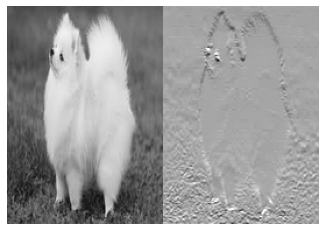

In [0]:
horizontal_line_conv = [[1, 1], 
                        [-1, -1]]
# load_my_image and visualize_conv are utility functions provided for this exercise
original_image = load_my_image() 
visualize_conv(original_image, horizontal_line_conv)

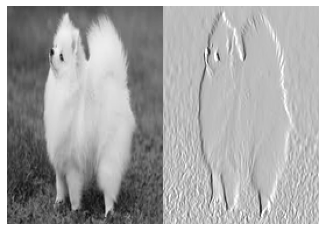

In [0]:
horizontal_line_conv = [[1, -1], 
                        [1, -1]]
# load_my_image and visualize_conv are utility functions provided for this exercise
original_image = load_my_image() 
visualize_conv(original_image, horizontal_line_conv)